

# Dooooooooooom - project - quick start

Create a virtual environment
```bash
python -m venv venv
```

Activate the virtual environment

On macOS/Linux:
```bash
source venv/bin/activate
```

On Windows (Command Prompt):
```bash
venv\Scripts\activate
```
```bash
pip install vizdoom
```

Run below example cell 


### Example cell spinning up a game instance and feeding the game look random actions


In [1]:
import vizdoom as vzd
import os
import random
import numpy as np

# Create a game instance
game = vzd.DoomGame()

# Find the scenarios directory in the VizDoom package
scenarios_path = os.path.join(os.path.dirname(vzd.__file__), 'scenarios')
print(f"VizDoom scenarios directory: {scenarios_path}")

# Check if scenarios directory exists and list available scenarios
if os.path.exists(scenarios_path):
    scenarios = [f for f in os.listdir(scenarios_path) if f.endswith('.cfg')]
    print(f"Available scenario configs: {scenarios}")
else:
    print("Scenarios directory not found!")

# Load basic scenario configuration file
basic_config_path = os.path.join(scenarios_path, 'basic.cfg')

if os.path.exists(basic_config_path):
    game.load_config(basic_config_path)
    print(f"Loaded config from: {basic_config_path}")
else:
    print(f"Config file not found at: {basic_config_path}")
    print("Setting up manual configuration...")
    
    # Manual configuration if config file not found
    # Set the scenario WAD file path
    basic_wad_path = os.path.join(scenarios_path, 'basic.wad')
    game.set_doom_scenario_path(basic_wad_path)
    game.set_doom_map("map01")
    
    # Configure screen and rendering
    game.set_screen_resolution(vzd.ScreenResolution.RES_640X480)
    game.set_screen_format(vzd.ScreenFormat.RGB24)
    game.set_render_hud(False)
    game.set_render_crosshair(True)
    game.set_render_weapon(True)
    game.set_render_decals(False)
    game.set_render_particles(False)
    
    # Add available buttons for the basic scenario
    game.add_available_button(vzd.Button.MOVE_LEFT)
    game.add_available_button(vzd.Button.MOVE_RIGHT)
    game.add_available_button(vzd.Button.MOVE_FORWARD)
    game.add_available_button(vzd.Button.MOVE_BACKWARD)
    game.add_available_button(vzd.Button.ATTACK)
    game.add_available_button(vzd.Button.ALTATTACK)
    game.add_available_button(vzd.Button.USE)
   
    
    # Set other game parameters
    game.set_episode_timeout(200)
    game.set_window_visible(True)
    game.set_living_reward(-1)

# Initialize the game
try:
    game.init()
    print("VizDoom initialized successfully!")
    print(f"Available actions: {len(game.get_available_buttons())} buttons")
    
    for i in range(1000):
        # Get the state
        state = game.get_state()
        
        if state:
            # Get screen buffer
            screen = state.screen_buffer
            print(f"Frame {i}: Screen shape: {screen.shape}")
            
            # Perform a random action
            # Get number of available buttons
            n_buttons = len(game.get_available_buttons())
            
            # Completely random actions
            action = [random.choice([True, False]) for _ in range(n_buttons)]
            
            
            reward = game.make_action(action)
            print(f"Frame {i}: Action {action}, Reward: {reward}")
            
            if game.is_episode_finished():
                print("Episode finished, starting new episode...")
                game.new_episode()
        else:
            print("No state available, breaking...")
            break
    
    game.close()
    print("Game closed successfully.")
    
except Exception as e:
    print(f"Error initializing VizDoom: {e}")
    game.close()

VizDoom scenarios directory: c:\Users\lexpaton\venv\Lib\site-packages\vizdoom\scenarios
Available scenario configs: ['basic.cfg', 'cig.cfg', 'deadly_corridor.cfg', 'deathmatch.cfg', 'defend_the_center.cfg', 'defend_the_line.cfg', 'health_gathering.cfg', 'health_gathering_supreme.cfg', 'learning.cfg', 'multi.cfg', 'multi_duel.cfg', 'my_way_home.cfg', 'oblige.cfg', 'predict_position.cfg', 'rocket_basic.cfg', 'simpler_basic.cfg', 'take_cover.cfg']
Loaded config from: c:\Users\lexpaton\venv\Lib\site-packages\vizdoom\scenarios\basic.cfg
VizDoom initialized successfully!
Available actions: 3 buttons
Frame 0: Screen shape: (3, 240, 320)
Frame 0: Action [True, True, False], Reward: -1.0
Frame 1: Screen shape: (3, 240, 320)
Frame 1: Action [False, False, True], Reward: -1.0
Frame 2: Screen shape: (3, 240, 320)
Frame 2: Action [True, False, True], Reward: -1.0
Frame 3: Screen shape: (3, 240, 320)
Frame 3: Action [True, True, True], Reward: -1.0
Frame 4: Screen shape: (3, 240, 320)
Frame 4: Actio

## Loading HF Dataset

In [4]:
from datasets import load_dataset

# Download dataset from Hugging Face
dataset = load_dataset("P-H-B-D-a16z/ViZDoom-Deathmatch-PPO")
print(dataset)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Generating train split: 100%|██████████| 5061/5061 [00:08<00:00, 616.55 examples/s]


DatasetDict({
    train: Dataset({
        features: ['episode_id', 'step_id', 'health', 'actions', 'images'],
        num_rows: 5061
    })
})


['episode_id', 'step_id', 'health', 'actions', 'images']
Number of steps: 5061
0 4858 [35, 35, 35, 35, 35, 60, 60, 60, 60, 60] [10, 7, 13, 1, 11, 14, 0, 4, 7, 7]
0 4680 [25, 20, 20, 20, 20, 20, 20, 20, 20, 20] [9, 9, 2, 9, 2, 2, 6, 6, 9, 0]
0 1920 [85, 85, 85, 85, 85, 85, 85, 85, 85, 85] [11, 17, 8, 17, 7, 8, 7, 7, 8, 7]


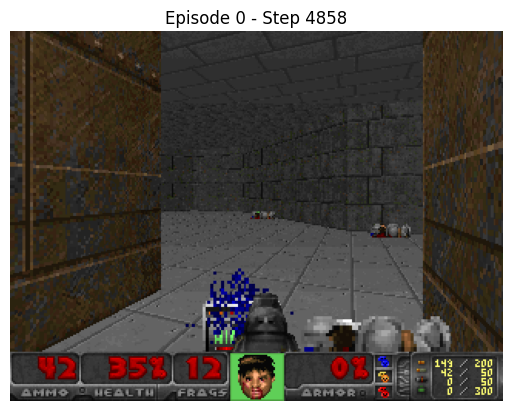

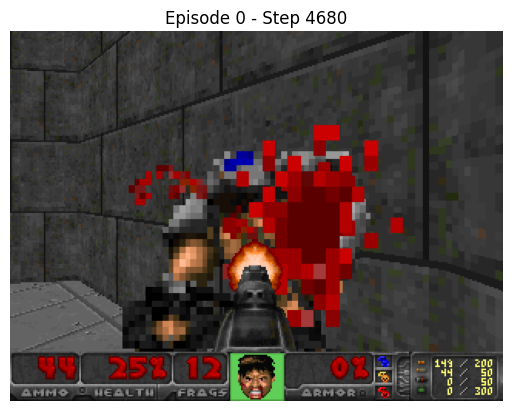

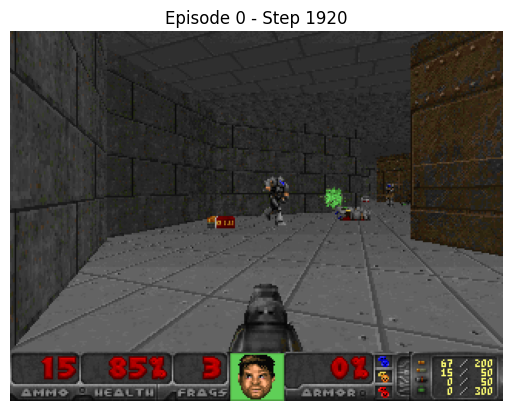

In [10]:
import matplotlib.pyplot as plt
import base64
import io
from PIL import Image

# Select the train split
train_dataset = dataset["train"]

# Column names and number of steps
print(train_dataset.column_names)
print(f"Number of steps: {len(train_dataset)}")

# Check first few rows
for i in range(3):
    print(train_dataset[i]["episode_id"], 
          train_dataset[i]["step_id"], 
          train_dataset[i]["health"], 
          train_dataset[i]["actions"])

def decode_base64_image(base64_str):
    image_bytes = base64.b64decode(base64_str)
    img = Image.open(io.BytesIO(image_bytes))
    return np.array(img)

def show_frame(idx, frame_idx=0):
    # images is a list, pick the first frame by default
    base64_img_list = train_dataset[idx]["images"]
    base64_img = base64_img_list[frame_idx]  # pick first frame
    img = decode_base64_image(base64_img)
    plt.imshow(img)
    plt.title(f"Episode {train_dataset[idx]['episode_id']} - Step {train_dataset[idx]['step_id']}")
    plt.axis('off')
    plt.show()

# Show first 3 steps
for i in range(3):
    show_frame(i)


## EDA

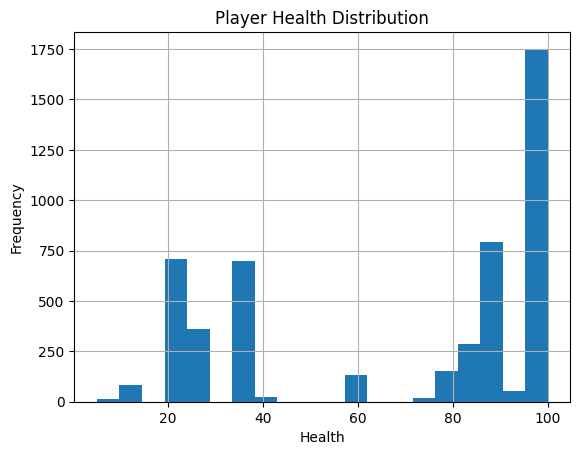

Health summary (per channel):
Channel 0: min=5, max=100, mean=68.36, median=90.0
Channel 1: min=5, max=100, mean=68.36, median=90.0
Channel 2: min=5, max=100, mean=68.36, median=90.0
Channel 3: min=5, max=100, mean=68.36, median=90.0
Channel 4: min=5, max=100, mean=68.36, median=90.0
Channel 5: min=5, max=100, mean=68.36, median=90.0
Channel 6: min=5, max=100, mean=68.36, median=90.0
Channel 7: min=5, max=100, mean=68.36, median=90.0
Channel 8: min=5, max=100, mean=68.36, median=90.0
Channel 9: min=5, max=100, mean=68.36, median=90.0


In [23]:
import pandas as pd
import collections 
from collections import Counter
import random
import seaborn as sns

# Health distro
healths = [step["health"][0] for step in train_dataset]  
pd.Series(healths).hist(bins=20)
plt.title("Player Health Distribution")
plt.xlabel("Health")
plt.ylabel("Frequency")
plt.show()

# Health stats
health_array = np.array([step["health"] for step in train_dataset]) 
print("Health summary (per channel):")
for i in range(health_array.shape[1]):
    print(f"Channel {i}: min={health_array[:,i].min()}, max={health_array[:,i].max()}, mean={health_array[:,i].mean():.2f}, median={np.median(health_array[:,i])}")


Health channels are identical, can use just one. Min and max show big health range so training will have a variety of situations. Mean shows moderate health on average so decent play skill for training. 

In [25]:
# Convert each action array to a tuple of ints
action_array = [tuple(int(a) for a in step["actions"]) for step in train_dataset]

action_counts = Counter(action_array)
print("\nTop 5 most common action tuples:")
for action, count in action_counts.most_common(5):
    print(f"{action}: {count} times")


Top 5 most common action tuples:
(17, 17, 17, 17, 17, 17, 17, 17, 17, 17): 5 times
(7, 7, 7, 7, 7, 7, 7, 7, 7, 7): 3 times
(7, 7, 7, 7, 7, 7, 11, 7, 7, 7): 2 times
(7, 7, 7, 7, 7, 7, 7, 9, 7, 7): 2 times
(10, 7, 13, 1, 11, 14, 0, 4, 7, 7): 1 times
